# Explore here

In [7]:
import pandas as pd


total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
total_data.shape

(1338, 7)

In [9]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


existe un total de 1338 filas y 6 columnas, no se aprecia que las columnas tengan nulos.

por otra parte, tenemos:

4 carasteristicas numericas y 3 carasteristicas categoricas.

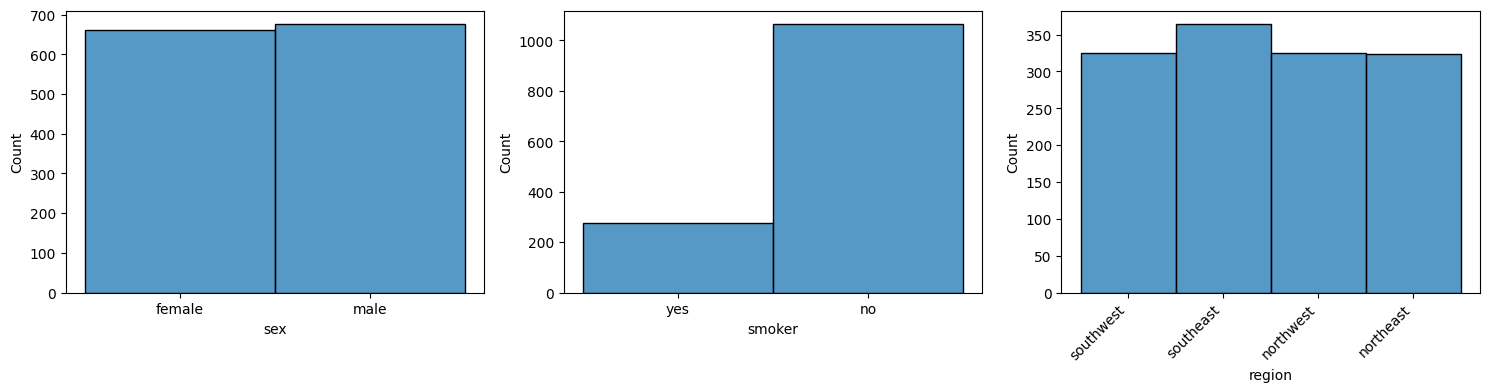

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns


fig, axis = plt.subplots(2, 3, figsize=(15, 7))

# Create Histogram
sns.histplot(ax = axis[0,0], data = total_data, x = "sex")
sns.histplot(ax = axis[0,1], data = total_data, x = "smoker")
sns.histplot(ax = axis[0,2], data = total_data, x = "region")

plt.setp(axis[0,2].get_xticklabels(), rotation=45, ha='right')

fig.delaxes(axis[1, 0])
fig.delaxes(axis[1, 1])
fig.delaxes(axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

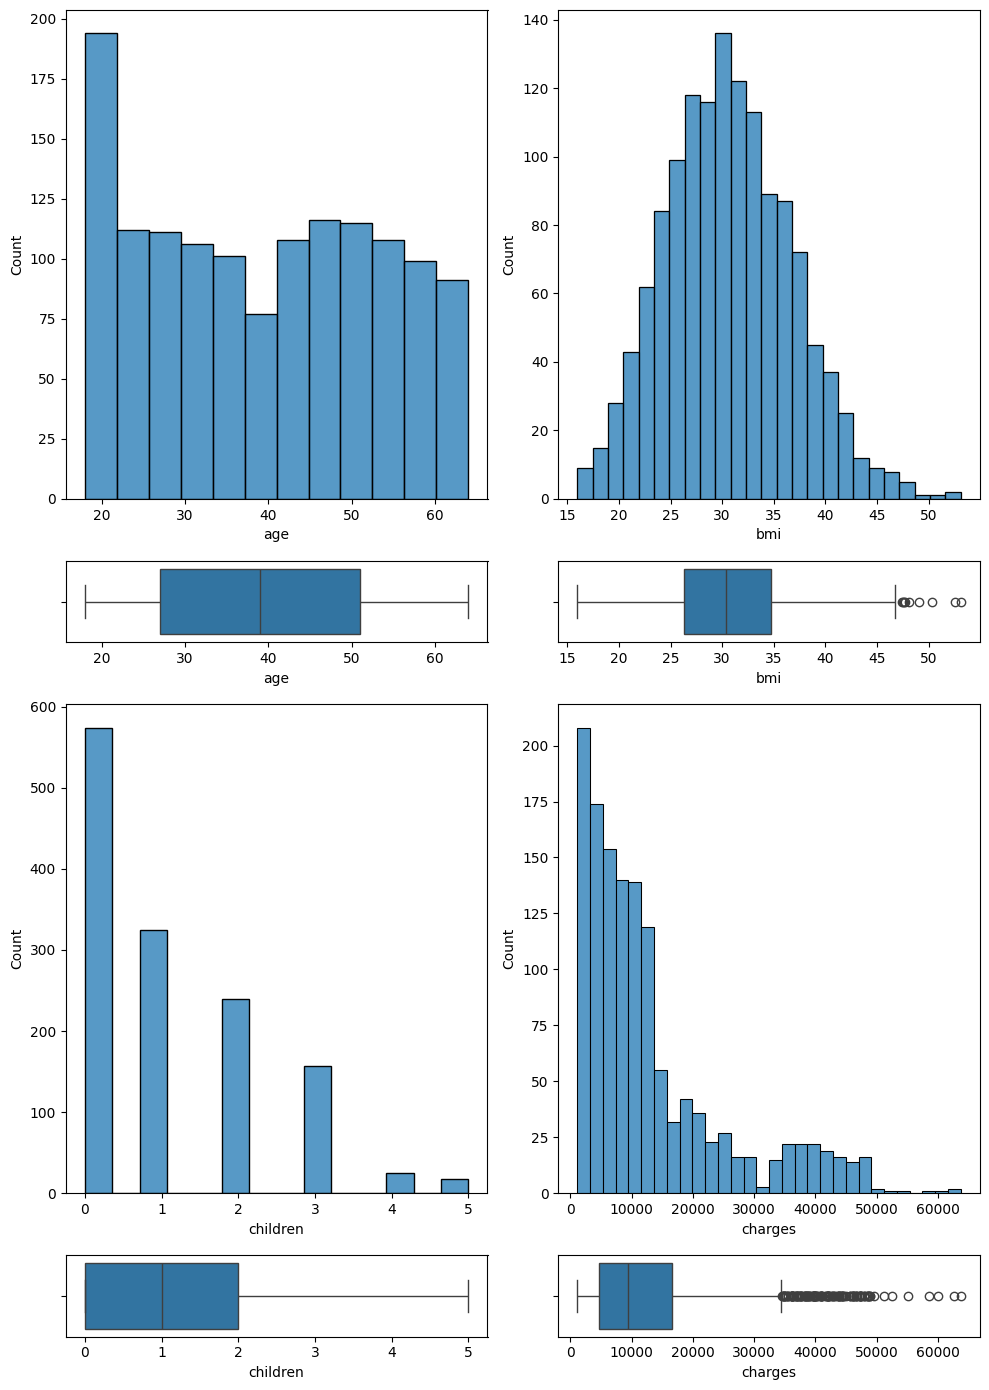

In [22]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1,]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "age")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")

sns.histplot(ax = axis[0, 1], data = total_data, x = "bmi")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "bmi")

sns.histplot(ax = axis[2, 0], data = total_data, x = "children")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "children")

sns.histplot(ax = axis[2, 1], data = total_data, x = "charges")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "charges")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Analisis de variables multivariante

Analisis numérico-numérico

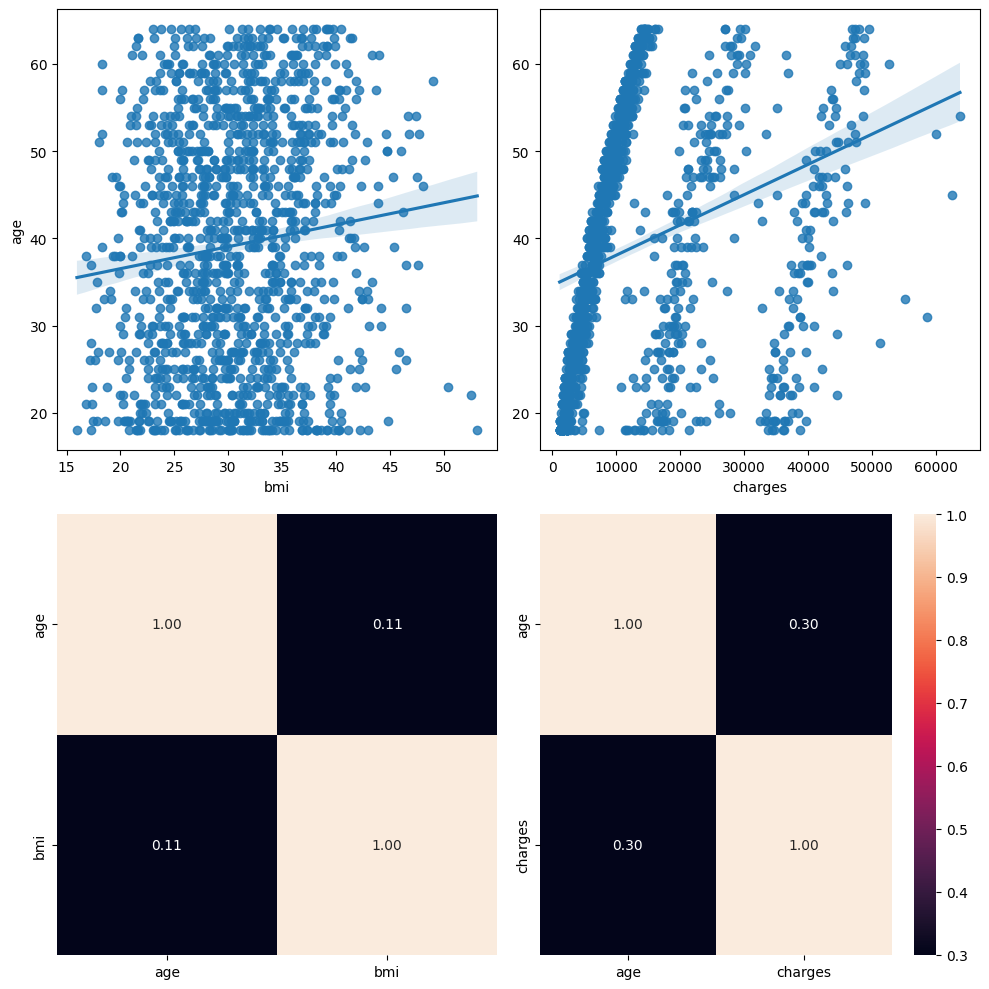

In [29]:
fig, axis = plt.subplots(2, 2, figsize = (10, 10))

sns.regplot(ax = axis[0, 0], data = total_data, x = "bmi", y = "age")
sns.heatmap(total_data[["age", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "charges", y = "age").set(ylabel = None)
sns.heatmap(total_data[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])





# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Se puede visualizar en las graficas que no existe correlacion entre las variables numericas vitas con respecto a la edad

Analisis categorico-categorico

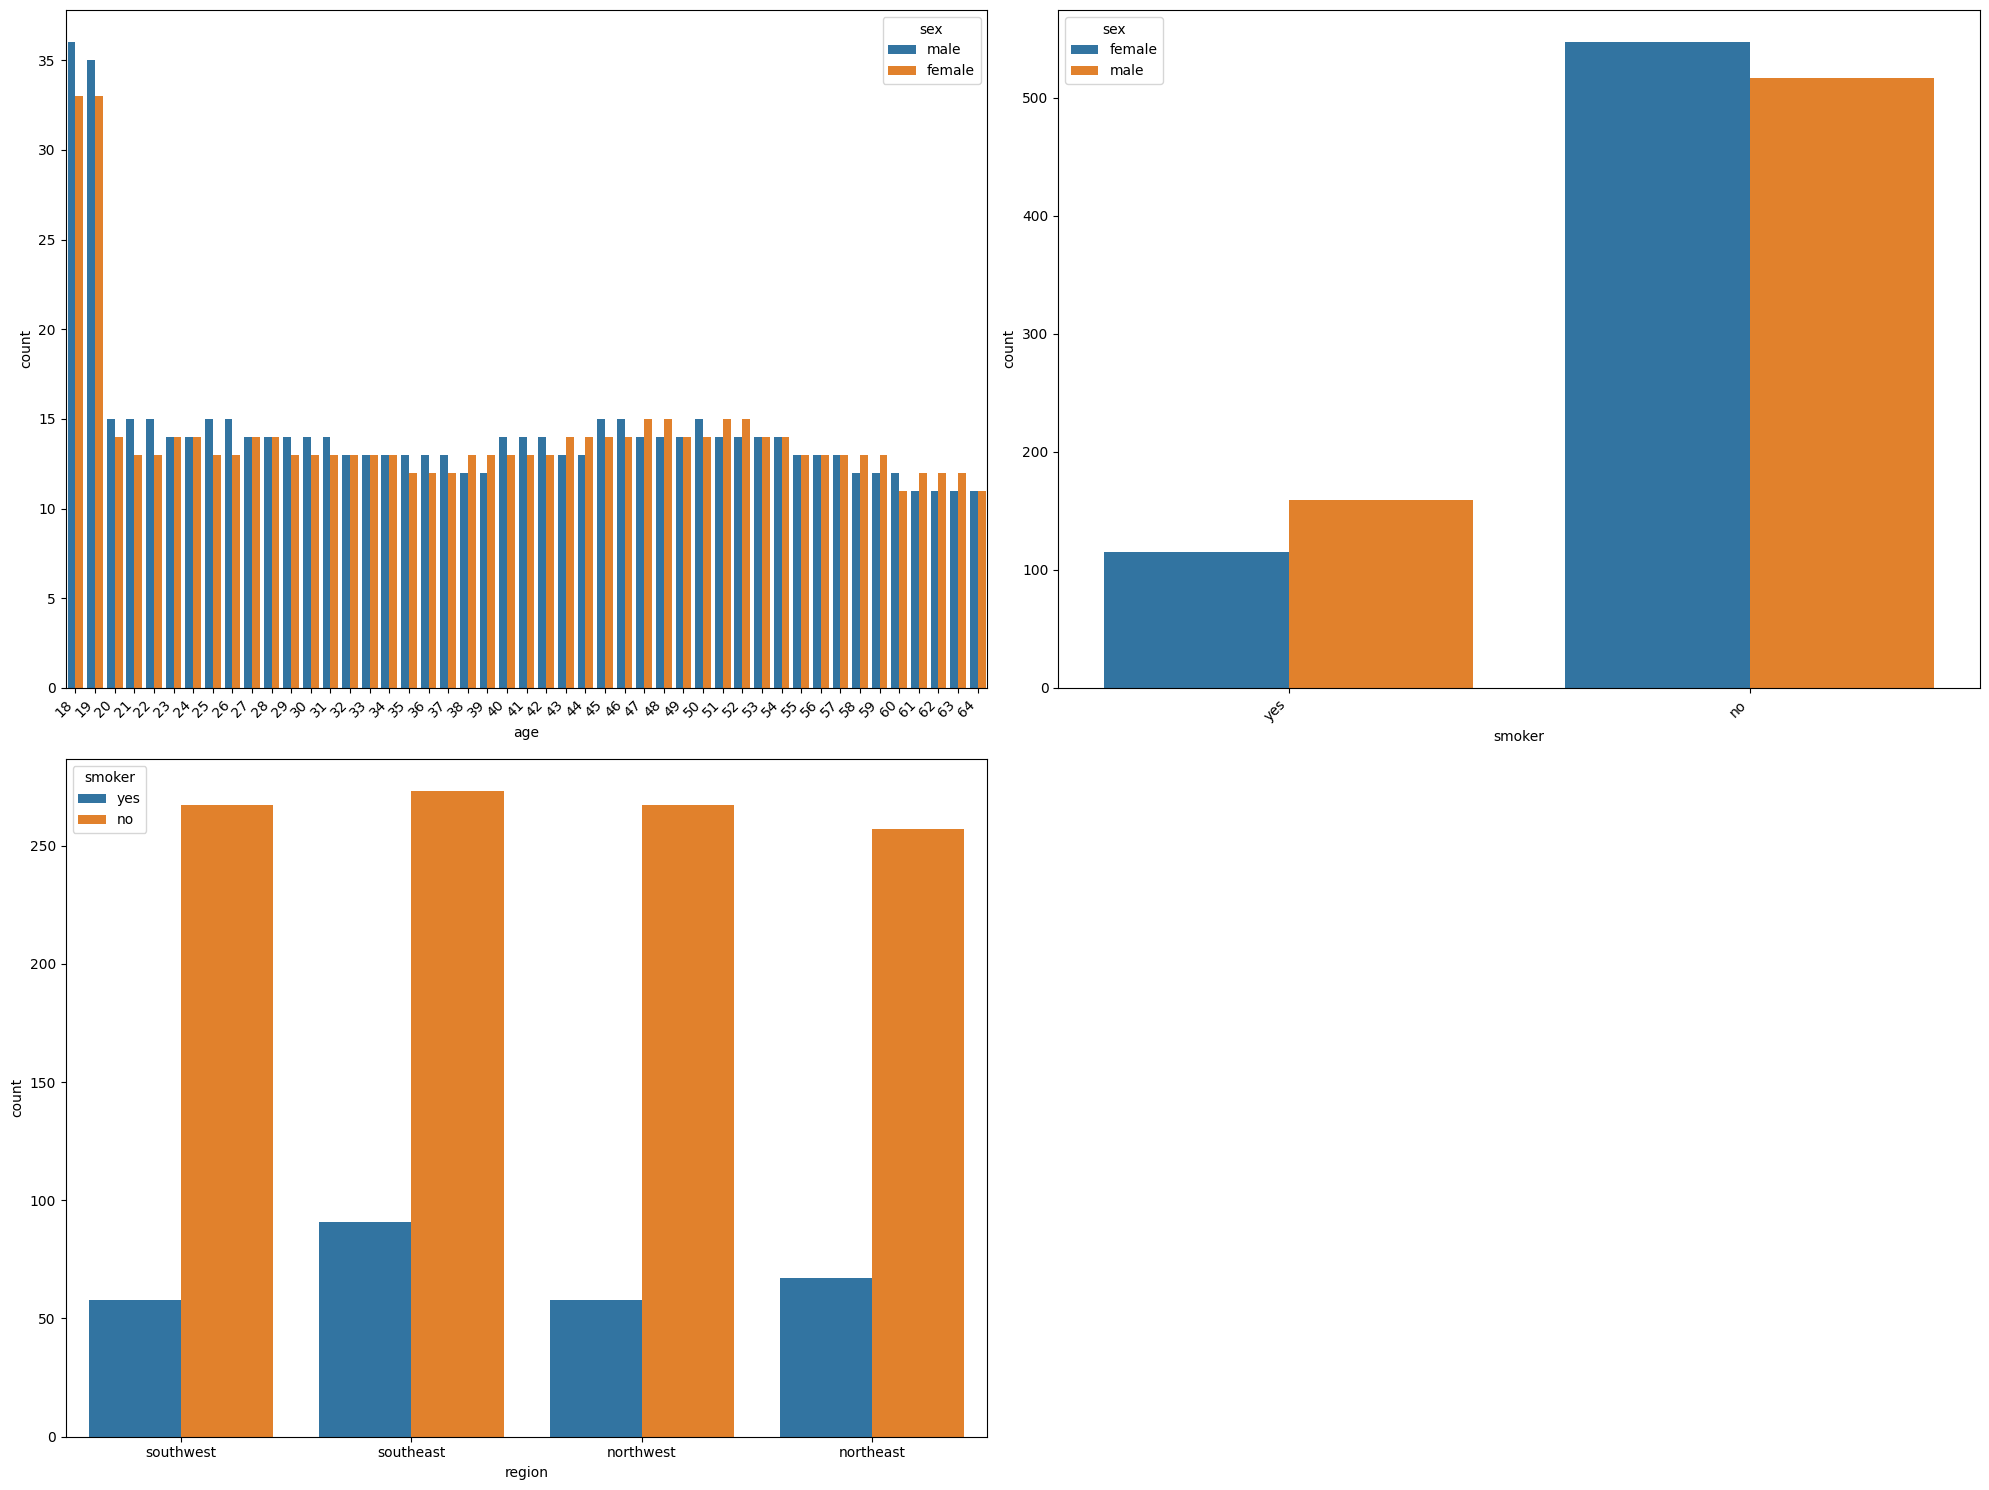

In [ ]:
fig, axis = plt.subplots(2, 2, figsize = (20, 15))

sns.countplot(ax = axis[0, 0], data = total_data, x = "age", hue = "sex")
sns.countplot(ax = axis[0, 1], data = total_data, x = "smoker", hue = "sex")
sns.countplot(ax = axis[1, 0], data = total_data, x = "region", hue = "smoker")

plt.setp(axis[0,0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axis[0,1].get_xticklabels(), rotation=45, ha='right')


fig.delaxes(axis[1, 1])

plt.tight_layout()


plt.show()

Combinaciones de la clase con varias predictoras

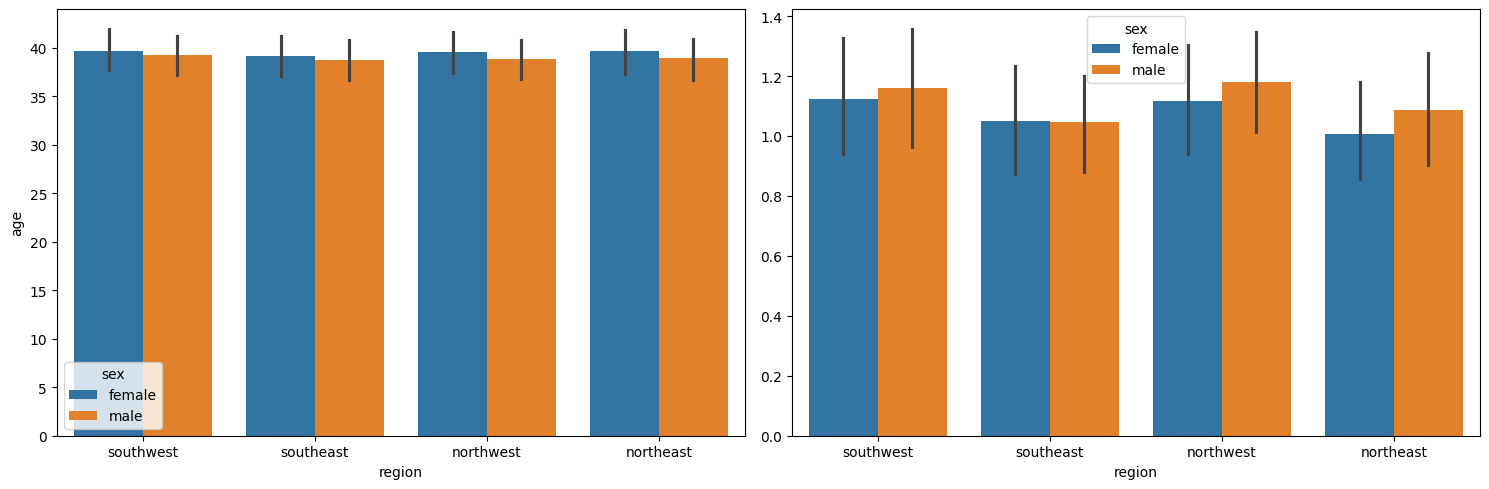

In [49]:
fig, axis = plt.subplots(figsize = (15, 5), ncols = 2)

sns.barplot(ax = axis[0], data = total_data, x = "region", y = "age", hue = "sex")
sns.barplot(ax = axis[1], data = total_data, x = "region", y = "children", hue = "sex").set(ylabel = None)


plt.tight_layout()

plt.show()

In [51]:
total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data[["sex_n", "sex"]]

,sex_n,sex
0,0,female
1,1,male
2,1,male
3,1,male
4,1,male
...,...,...
1333,1,male
1334,0,female
1335,0,female
1336,0,female


In [52]:
total_data[["sex_n", "sex"]].drop_duplicates()

,sex_n,sex
0,0,female
1,1,male


In [53]:
sex_transformation_rules = {row["sex"]: row["sex_n"] for index, row in total_data[["sex_n", "sex"]].dropna().drop_duplicates().iterrows()}
print(sex_transformation_rules)

import json

# Escritura
with open("./sex_transformation_rules.json", "w") as f:
  json.dump(sex_transformation_rules, f)

# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./sex_transformation_rules.json", "r") as f:
  sex_transformation_rules = json.load(f)

import numpy as np

total_data["sex_n"] = total_data["sex"].apply(lambda x: sex_transformation_rules[x] if not pd.isna(x) else np.nan)
total_data

{'female': 0, 'male': 1}


,age,sex,bmi,children,smoker,region,charges,sex_n
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [54]:
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data[["smoker_n", "smoker"]]

,smoker_n,smoker
0,0,yes
1,1,no
2,1,no
3,1,no
4,1,no
...,...,...
1333,1,no
1334,1,no
1335,1,no
1336,1,no


In [55]:
total_data[["smoker_n", "smoker"]].drop_duplicates()

,smoker_n,smoker
0,0,yes
1,1,no


In [57]:
smoker_transformation_rules = {row["smoker"]: row["smoker_n"] for index, row in total_data[["smoker_n", "smoker"]].dropna().drop_duplicates().iterrows()}
print(smoker_transformation_rules)

import json

# Escritura
with open("./smoker_transformation_rules.json", "w") as f:
  json.dump(smoker_transformation_rules, f)

# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./smoker_transformation_rules.json", "r") as f:
  smoker_transformation_rules = json.load(f)


total_data["smoker_n"] = total_data["smoker"].apply(lambda x: smoker_transformation_rules[x] if not pd.isna(x) else np.nan)
total_data

{'yes': 0, 'no': 1}


,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1
4,32,male,28.880,0,no,northwest,3866.85520,1,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,1
1335,18,female,36.850,0,no,southeast,1629.83350,0,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1


In [58]:
total_data["region_n"] = pd.factorize(total_data["region"])[0]
total_data[["region_n", "region"]]

,region_n,region
0,0,southwest
1,1,southeast
2,1,southeast
3,2,northwest
4,2,northwest
...,...,...
1333,2,northwest
1334,3,northeast
1335,1,southeast
1336,0,southwest


In [59]:
total_data[["region_n", "region"]].drop_duplicates()

,region_n,region
0,0,southwest
1,1,southeast
3,2,northwest
8,3,northeast


In [60]:
region_transformation_rules = {row["region"]: row["region_n"] for index, row in total_data[["region_n", "region"]].dropna().drop_duplicates().iterrows()}
print(region_transformation_rules)

import json

# Escritura
with open("./region_transformation_rules.json", "w") as f:
  json.dump(region_transformation_rules, f)

# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./region_transformation_rules.json", "r") as f:
  region_transformation_rules = json.load(f)


total_data["region_n"] = total_data["region"].apply(lambda x: region_transformation_rules[x] if not pd.isna(x) else np.nan)
total_data

{'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}


,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


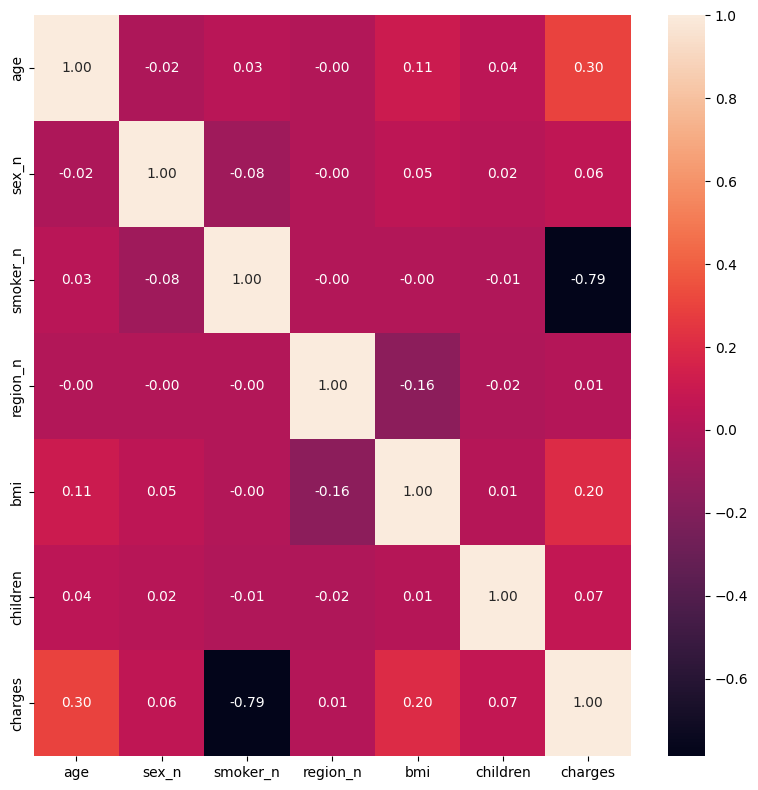

In [61]:
fig, axes = plt.subplots(figsize=(8, 8))

sns.heatmap(total_data[["age", "sex_n", "smoker_n", "region_n", "bmi",	
                        "children", "charges"]].corr(), annot = True, fmt = ".2f")


plt.tight_layout()

# Draw Plot
plt.show()

Ingenieria de caracteristicas

valores atipicos

In [62]:
total_data.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.795217,1.484305
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,1.104885
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


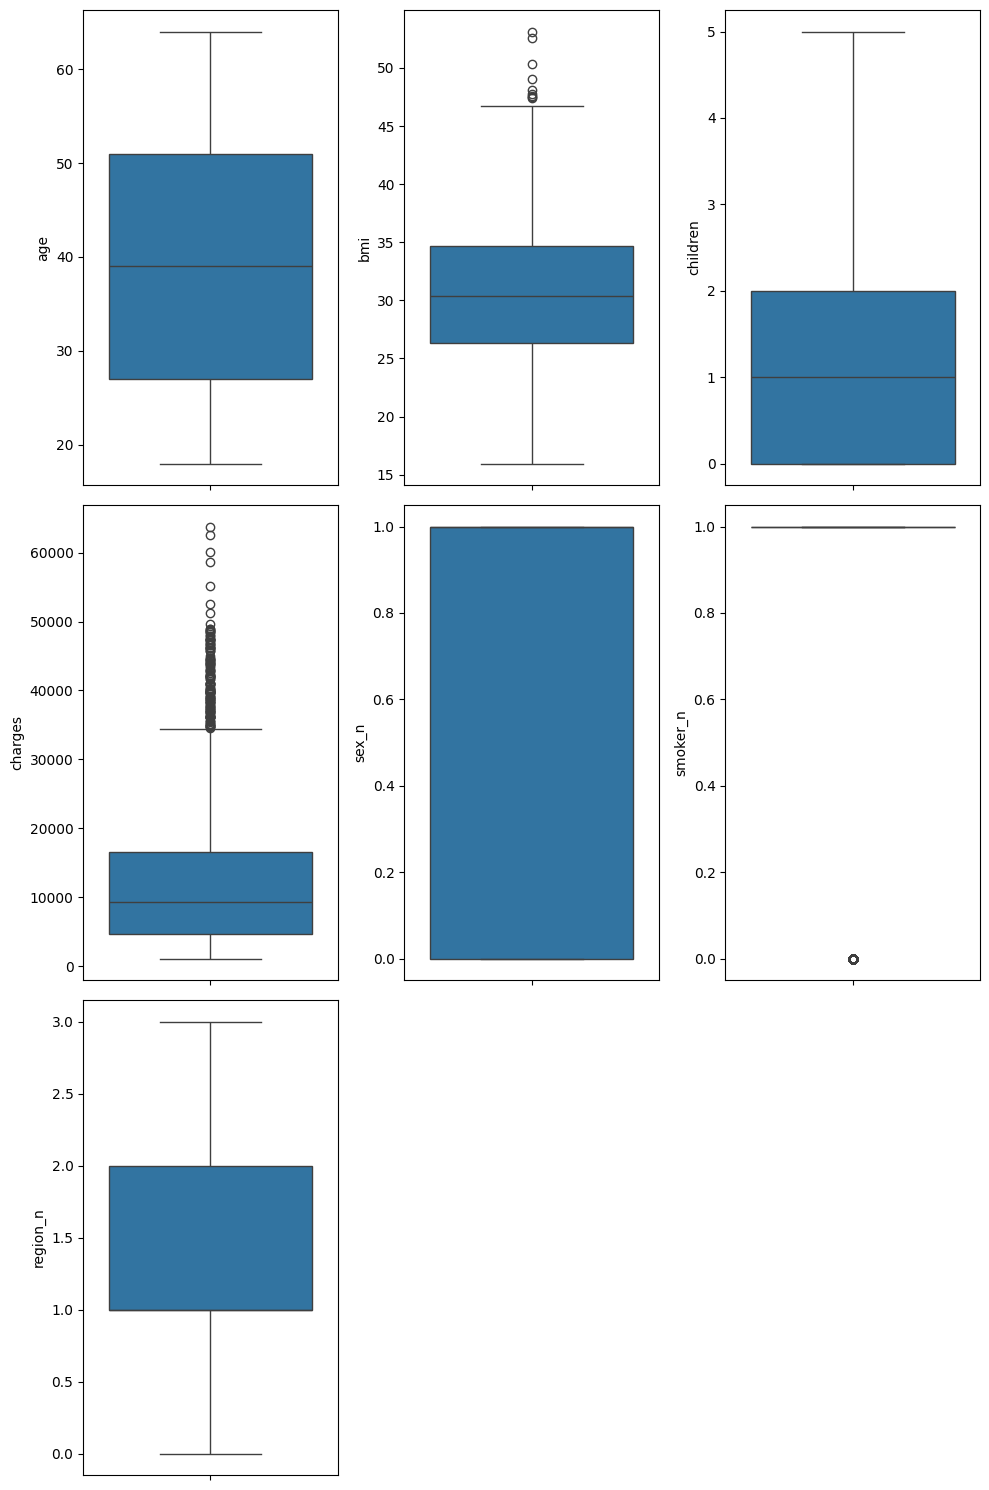

In [63]:
fig, axes = plt.subplots(3, 3, figsize = (10, 15))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "age")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "bmi")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "children")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "charges")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "sex_n")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "smoker_n")
sns.boxplot(ax = axes[2, 0], data = total_data, y = "region_n")
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

plt.tight_layout()

plt.show()

Deteccion de valores atipicos.

In [64]:
data_CON_outliers = total_data.copy()

data_SIN_outliers = total_data.copy()
# Para cada una de las variables con outliers en mi problema, tengo que reemplazar sus valores del DF

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["bmi", "charges", "smoker_n"]:
  data_SIN_outliers, limit_list = replace_outliers_from_column(column, data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'bmi': [np.float64(13.7), np.float64(47.290000000000006)],
 'charges': [1121.8739, np.float64(34489.350562499996)],
 'smoker_n': [np.float64(1.0), np.float64(1.0)]}

In [65]:
data_CON_outliers

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


In [66]:
data_SIN_outliers

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,1.0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1.0,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1.0,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1.0,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1.0,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1.0,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1.0,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1.0,0


In [67]:
data_CON_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

In [68]:
data_SIN_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

Obtencion de porcentajes por columnas de datos vacios (para posibles futuros casos)

In [69]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
sex_n       0.0
smoker_n    0.0
region_n    0.0
dtype: float64

Escalado de valores

In [74]:
from sklearn.model_selection import train_test_split

num_variables = ["bmi", "children", 
                 "charges", "sex_n", "smoker_n", "region_n"]

# Dividimos el conjunto de datos en muestras de train y test
X_CON = data_CON_outliers.drop("age", axis = 1)[num_variables]
y = data_CON_outliers["age"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)

X_SIN = data_SIN_outliers.drop("age", axis = 1)[num_variables]
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()

,bmi,children,charges,sex_n,smoker_n,region_n
560,19.95,2,9193.83850,0,1,2
1285,24.32,0,8534.67180,0,1,3
1142,24.86,0,27117.99378,0,1,1
969,34.32,5,8596.82780,0,1,1
486,21.47,3,12475.35130,0,1,2


Normalización

In [75]:
from sklearn.preprocessing import StandardScaler
import pickle

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)


### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_norm.head()

,bmi,children,charges,sex_n,smoker_n,region_n
560,-1.756525,0.734336,-0.345621,-1.024602,0.508747,0.456116
1285,-1.033082,-0.911192,-0.400488,-1.024602,0.508747,1.353256
1142,-0.943687,-0.911192,1.146332,-1.024602,0.508747,-0.441024
969,0.622393,3.202629,-0.395314,-1.024602,0.508747,-0.441024
486,-1.504893,1.557100,-0.072478,-1.024602,0.508747,0.456116


In [76]:
from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)


### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_scal.head()

,bmi,children,charges,sex_n,smoker_n,region_n
560,0.107345,0.4,0.131313,0.0,1.0,0.666667
1285,0.224913,0.0,0.120590,0.0,1.0,1.000000
1142,0.239440,0.0,0.422901,0.0,1.0,0.333333
969,0.493947,1.0,0.121601,0.0,1.0,0.333333
486,0.148238,0.6,0.184696,0.0,1.0,0.666667


In [78]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 21.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [79]:
X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index = False)
X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)

X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)
X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)

y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming these variables are defined in your environment
# X_train_con_outliers, X_train_sin_outliers, etc.
# y_train

datasets = [
    ("X_train_con_outliers", X_train_con_outliers),
    ("X_train_sin_outliers", X_train_sin_outliers),
    ("X_train_con_outliers_norm", X_train_con_outliers_norm),
    ("X_train_sin_outliers_norm", X_train_sin_outliers_norm),
    ("X_train_con_outliers_scal", X_train_con_outliers_scal),
    ("X_train_sin_outliers_scal", X_train_sin_outliers_scal),
]

results_mse = []
results_r2 = []
models = []
for name, dataset in datasets:
    model = LinearRegression() # Modelo base
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)

    r2 = r2_score(y_train, y_pred)
    mse = mean_squared_error (y_train, y_pred)

    results_mse.append(mse)
    results_r2.append(r2)
    models.append(model)

mejor_index = results_r2.index(max(results_r2))

print("Resultado MSE:", results_mse)
print("Resultado R2:", results_r2)
print("mejor R2 score:", max(results_r2))
print("mejor dataset name:", datasets[mejor_index][0])

mejor_dataset = datasets[mejor_index][1]
print("Best dataset:", mejor_dataset)




Resultado MSE: [144.25858981563235, 179.38293831357853, 144.25858981563235, 179.3829383135785, 144.25858981563235, 179.3829383135785]
Resultado R2: [0.27102082541436023, 0.09352762650942748, 0.27102082541436023, 0.09352762650942759, 0.27102082541436023, 0.09352762650942759]
mejor R2 score: 0.27102082541436023
mejor dataset name: X_train_con_outliers
Best dataset:          bmi  children      charges  sex_n  smoker_n  region_n
560   19.950         2   9193.83850      0         1         2
1285  24.320         0   8534.67180      0         1         3
1142  24.860         0  27117.99378      0         1         1
969   34.320         5   8596.82780      0         1         1
486   21.470         3  12475.35130      0         1         2
...      ...       ...          ...    ...       ...       ...
1095  31.350         4   4561.18850      0         1         3
1130  23.870         5   8582.30230      0         1         1
1294  25.175         0  11931.12525      1         1         3
860 